In [5]:
import pandas as pd
import numpy as np

employees = pd.read_csv("C:/Users/Michael Botelho/bip-python-unh/user_audit/data/employees.csv")
system_access = pd.read_csv("C:/Users/Michael Botelho/bip-python-unh/user_audit/data/system_access.csv")




<BarContainer object of 1000 artists>

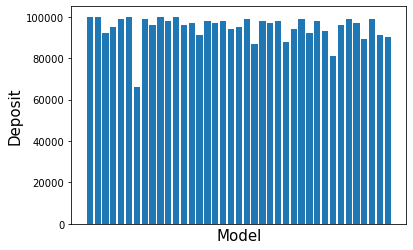

In [140]:
# Import Pandas & Read in Data

import pandas as pd

contracts = pd.read_csv("C:/Users/Michael Botelho/bip-python-unh/sales_analysis/data/contracts.csv", delimiter =',', encoding="utf-8-sig")
customers = pd.read_csv("C:/Users/Michael Botelho/bip-python-unh/sales_analysis/data/customers.csv", delimiter =',', encoding="utf-8-sig")


# Changing Data Types

customers['id'] = customers['id'].astype(str)
contracts['customer_id'] = contracts['customer_id'].astype(str)



# Merge/Join to one DataFrame

df = pd.merge(customers, contracts, left_on='id', right_on='customer_id')


# Fix Dollar Signs & Commas & Convert to Float

df['deposit'] = df['deposit'].replace('[$,()]', '', regex=True)
df['deposit'] = df['deposit'].astype(float)



# Calculate Total Sales By State

total_sales = df.groupby(['state'])['deposit'].agg('sum')
total_sales = df.groupby(['state'])['deposit'].agg('mean','sum')
pd.set_option('display.max_columns', None)
total_sales.columns = ['state', 'total sales']

# VISUALIZACIONES ##########################################################################################################

# Cleaning Monthly_Amt
df['monthly_amt'] = df['monthly_amt'].replace('[$,()]', '', regex=True)
df['monthly_amt'] = df['monthly_amt'].astype(float)

vis_df = df.groupby('industry').agg({'deposit':'sum'})
vis_df = df.groupby(['industry','state', 'monthly_amt', 'deposit']).agg({'deposit':'sum'})
vis_df = df.groupby(['state']).agg({'deposit':'sum'})
vis_df = df.groupby(['industry','state', 'monthly_amt', 'deposit']).agg({'deposit':'sum'})
#vis_df = df.groupby(['state']).agg({'monthly_amt':'sum'})
#vis_df.sort_values('total').tail(10).plot(kind = 'bar')
#vis_df.reset_index(inplace=True)
import matplotlib.pyplot as plt
#vis_df.sort_values('deposit').tail(10).plot(kind = 'bar')
#plt.plot(df['state'], df['deposit'])



x = df['deposit']
y = df['state'] 
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Deposit', fontsize = 15)
#plt.axis([0, 110000, )
plt.xticks(x, df['state'])
plt.bar(y, x)
#plt.hist(y)

In [43]:
df

,id,company,sector,industry,email,address,city,state,zip,contract_id,customer_id,contract_start,contract_term,deposit,monthly_amt
0,1,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,41,1,5/31/2019,24,86000.0,"$11,200.00"
1,1,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,358,1,6/18/2019,13,74000.0,"$19,000.00"
2,1,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,400,1,8/11/2019,19,38000.0,"$8,800.00"
3,1,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,424,1,3/13/2019,15,77000.0,"$14,300.00"
4,1,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,438,1,10/16/2019,22,39000.0,"$20,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,Kwinu,Health Care,Biotechnology: Biological Products (No Diagnos...,nrenak5j@tripadvisor.com,80 Valley Edge Park,Los Angeles,CA,90055,284,200,12/28/2019,17,78000.0,"$17,600.00"
996,200,Kwinu,Health Care,Biotechnology: Biological Products (No Diagnos...,nrenak5j@tripadvisor.com,80 Valley Edge Park,Los Angeles,CA,90055,540,200,4/17/2019,3,65000.0,"$9,800.00"
997,200,Kwinu,Health Care,Biotechnology: Biological Products (No Diagnos...,nrenak5j@tripadvisor.com,80 Valley Edge Park,Los Angeles,CA,90055,630,200,11/1/2019,12,85000.0,"$12,600.00"
998,200,Kwinu,Health Care,Biotechnology: Biological Products (No Diagnos...,nrenak5j@tripadvisor.com,80 Valley Edge Park,Los Angeles,CA,90055,862,200,10/2/2019,21,48000.0,"$6,500.00"


In [12]:
vis_df = df.groupby('state').agg({'total':'sum'})

vis_df.sort_values('total').tail(10).plot(kind = 'bar')
vis_df2 = df.groupby('industry').agg({'deposit':'sum'})
vis_df2.sort_values('deposit').tail(10).plot(kind = 'bar').yaxis.set_major_formatter('${x:1, 2f}')
import matplotlib.pyplot as plt
vis_df2 = vis_df2.tail(10)
vis_df2.reset_index(inplace=True)
plt.plot(vis_df2['industry'], vis_df2['deposit'])
plt.xticks(rotation=45)
plt.show()

SpecificationError: Column(s) ['total'] do not exist